# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import binarize
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# Loading the data

In [2]:
data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Exploratory data analysis

In [3]:
data['quality'].value_counts()    #Finding the count of the response variable

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
data['Quality'] = data['quality'].apply(lambda x:'1' if x>6 else '0')     #Converting the response variable to Binary

In [5]:
data.drop(['quality'],axis=1,inplace=True)    # drop the previous column

In [6]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [7]:
data.isna().sum()       #Checking for null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Quality                 0
dtype: int64

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


# Checking for outliers

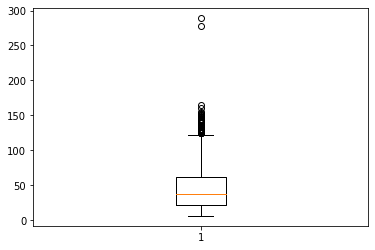

In [9]:
plt.boxplot(data['total sulfur dioxide'])
plt.show()

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)            #Finding Inter Quartile range

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
dtype: float64


In [11]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.reset_index(inplace=True,drop=True)          # Removing the outliers

In [12]:
data.Quality.value_counts()

0    1047
1     147
Name: Quality, dtype: int64

In [13]:
147/(1047+147)

0.12311557788944724

In [14]:
index = list(range(0,12))
columns = list(data.columns[0:11])
dictc = dict(zip(index,columns))
print(dictc)          # creating column names

{0: 'fixed acidity', 1: 'volatile acidity', 2: 'citric acid', 3: 'residual sugar', 4: 'chlorides', 5: 'free sulfur dioxide', 6: 'total sulfur dioxide', 7: 'density', 8: 'pH', 9: 'sulphates', 10: 'alcohol'}


# Splitting the data and standardizing the data

In [15]:
x = data.drop(['Quality'],axis=1)
y = data['Quality']
scaler = StandardScaler()
scaler.fit(x)
x= scaler.transform(x)
x = pd.DataFrame(x)
x=x.rename(columns=dictc)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
#len(x_test),len(x_train),len(y_train),len(y_test)
y_train = np.ravel(y_train)

# Running a Naive Logistic regression test

In [16]:
logit1 = sm.Logit(y.astype(float),sm.add_constant(x.astype(float))).fit()
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.240243
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Quality   No. Observations:                 1194
Model:                          Logit   Df Residuals:                     1182
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.3561
Time:                        22:50:26   Log-Likelihood:                -286.85
converged:                       True   LL-Null:                       -445.47
Covariance Type:            nonrobust   LLR p-value:                 2.037e-61
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.1687      0.190    -16.672      0.000      -3.541      -2.796

# Predicting the test and train sets

In [17]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
predict = logit.predict(x_test)
predictt = logit.predict(x_train)

In [18]:
prob_test = logit.predict_proba(x_test)[:,1]
#print(prob_test.reshape(1,-1))

In [19]:
prob_train = logit.predict_proba(x_train)[:,1]
#print(prob_train.reshape(1,-1))

In [20]:
accuracy_score(y_test,predict)

0.8746518105849582

In [21]:
confusion_matrix(y_test,predict)

array([[301,  18],
       [ 27,  13]])

In [22]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       319
           1       0.42      0.33      0.37        40

    accuracy                           0.87       359
   macro avg       0.67      0.63      0.65       359
weighted avg       0.86      0.87      0.87       359



# Dropping all the variables with no significance

In [23]:
data.drop(['fixed acidity'],axis=1,inplace=True)

In [24]:
data.drop(['residual sugar'],axis=1,inplace=True)

In [25]:
data.drop(['density'],axis=1,inplace=True)

In [26]:
data.drop(['pH'],axis=1,inplace=True)

In [27]:
data.drop(['chlorides'],axis=1,inplace=True)

In [28]:
data.drop(['citric acid'],axis=1,inplace=True)

In [29]:
data.drop(['free sulfur dioxide'],axis=1,inplace=True)

In [30]:
x = data.drop(['Quality'],axis=1)
y = data['Quality']


# Running the model after removing the non significant variables

In [31]:
logit1 = sm.Logit(y.astype(float),sm.add_constant(x.astype(float))).fit()
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.243175
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Quality   No. Observations:                 1194
Model:                          Logit   Df Residuals:                     1189
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.3482
Time:                        22:50:27   Log-Likelihood:                -290.35
converged:                       True   LL-Null:                       -445.47
Covariance Type:            nonrobust   LLR p-value:                 6.726e-66
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -17.1603      1.621    -10.589      0.000     -20.337     -13.984

# Predicting the train and test sets with the new model

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
len(x_test),len(x_train),len(y_train),len(y_test)

(359, 835, 835, 359)

In [33]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
predict = logit.predict(x_test)
predictt = logit.predict(x_train)

In [34]:
prob_test = logit.predict_proba(x_test)[:,1]
#print(prob_test.reshape(1,-1))

In [35]:
prob_train = logit.predict_proba(x_train)[:,1]
#print(prob_train.reshape(1,-1))

In [36]:
print("accuracy:",accuracy_score(y_test,predict))

accuracy: 0.8802228412256268


In [37]:
print("confusion matrix \n",confusion_matrix(y_test,predict))

confusion matrix 
 [[305  14]
 [ 29  11]]


In [38]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.44      0.28      0.34        40

    accuracy                           0.88       359
   macro avg       0.68      0.62      0.64       359
weighted avg       0.86      0.88      0.87       359



In [39]:
roc_auc_train = roc_auc_score(y_train,predictt)
fpr, tpr, threshold = roc_curve(pd.to_numeric(y_train),prob_train)
roc_auc = auc(fpr,tpr)

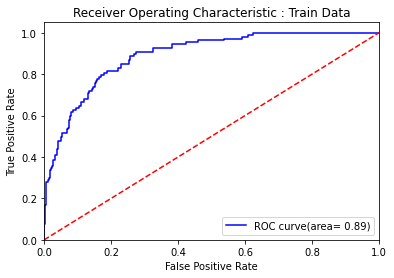

In [40]:
plt.figure()
plt.plot(fpr,tpr,color ='blue',label='ROC curve(area= %0.2f)'%(roc_auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic : Train Data")
plt.legend(loc='lower right')
plt.show()

In [41]:
roc_auc_test = roc_auc_score(y_test,predict)
fpr1, tpr1, threshold1 = roc_curve(pd.to_numeric(y_test),prob_test)
roc_auc1 = auc(fpr1,tpr1) 

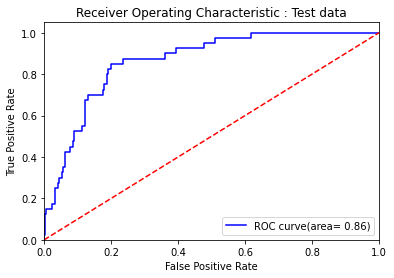

In [42]:
plt.figure()
plt.plot(fpr1,tpr1,color ='blue',label='ROC curve(area= %0.2f)'%(roc_auc1))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic : Test data")
plt.legend(loc='lower right')
plt.show()

# Trying out different cut-off values

In [43]:
y_predict = binarize(prob_test.reshape(1,-1),0.25)[0]
y_predict = y_predict.astype(int)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [44]:
confusion_matrix(pd.to_numeric(y_test),y_predict)

array([[279,  40],
       [ 13,  27]])

In [45]:
print(classification_report(pd.to_numeric(y_test),y_predict))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       319
           1       0.40      0.68      0.50        40

    accuracy                           0.85       359
   macro avg       0.68      0.77      0.71       359
weighted avg       0.89      0.85      0.87       359



In [46]:
y_predict = binarize(prob_test.reshape(1,-1),0.50)[0]
y_predict = y_predict.astype(int)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [47]:
confusion_matrix(pd.to_numeric(y_test),y_predict)

array([[305,  14],
       [ 29,  11]])

In [48]:
print(classification_report(pd.to_numeric(y_test),y_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.44      0.28      0.34        40

    accuracy                           0.88       359
   macro avg       0.68      0.62      0.64       359
weighted avg       0.86      0.88      0.87       359



In [49]:
y_predict = binarize(prob_test.reshape(1,-1),0.75)[0]
y_predict = y_predict.astype(int)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.75 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [50]:
confusion_matrix(pd.to_numeric(y_test),y_predict)

array([[319,   0],
       [ 39,   1]])

In [51]:
print(classification_report(pd.to_numeric(y_test),y_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       319
           1       1.00      0.03      0.05        40

    accuracy                           0.89       359
   macro avg       0.95      0.51      0.50       359
weighted avg       0.90      0.89      0.84       359



# Finding the best cutoff value

In [52]:
i = np.arange(len(tpr1))
roc = pd.DataFrame({'fpr':pd.Series(fpr1,index =i),'tpr':pd.Series(tpr1,index=i),
                   '1-fpr':pd.Series(1-fpr1,index=i),'tf':pd.Series(tpr1 - (1-fpr1),index=i),
                   'thresholds':pd.Series(threshold1,index=i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
42,0.191223,0.8,0.808777,-0.008777,0.168765


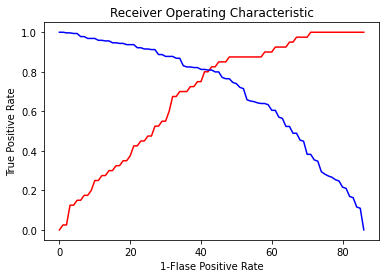

In [53]:
plt.figure
plt.plot(roc['tpr'],color='red')
plt.plot(roc['1-fpr'],color='blue')
plt.xlabel('1-Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [54]:
y_predict = binarize(prob_test.reshape(1,-1),0.16)[0]
y_predict = y_predict.astype(int)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.16 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [55]:
print("accuracy:",accuracy_score(pd.to_numeric(y_test),pd.to_numeric(y_predict)))

accuracy: 0.8022284122562674


In [56]:
print("confusion matrix:\n",confusion_matrix(pd.to_numeric(y_test),y_predict))

confusion matrix:
 [[255  64]
 [  7  33]]


In [57]:
print(classification_report(pd.to_numeric(y_test),y_predict))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       319
           1       0.34      0.82      0.48        40

    accuracy                           0.80       359
   macro avg       0.66      0.81      0.68       359
weighted avg       0.90      0.80      0.83       359

